# TTT4185 Machine learning for Speech technology

## Computer assigment 3a: Classification using Deep Neural Networks

This assignment assumes that the student has reviewed the material on deep neural networks.

In this assignment we will use the high level `Keras` framework together with `Tensorflow` to perform some deep learning experiments.

We will be using a small database of phonemes, where each phoneme is represented by the four first formant positions ("F1"-"F4") and their corresponding bandwidths ("B1"-"B4"). All numbers are in kHz. In addition, the speaker ID and the gender of the speaker are given for each phoneme.

The first few cells of this notebook contain example code to load and extract data, setup a simple network and train a deep neural network for classification. 

Note that we do not have a test dataset, but only training and validation sets. We do some experiments on the training set and observe the effect on the validation set.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [5]:
# Load data from CSV files 
rawtrain = pd.read_csv("Train.csv")
rawvalid = pd.read_csv("Validation.csv")

# Take a peek at the raw data
rawtrain.head(10)

,SpeakerID,Gender,Phoneme,F1,F2,F3,F4,B1,B2,B3,B4
0,cjf0,F,h#,0.701982,2.125440,2.433528,3.530050,0.264459,0.326273,0.300301,0.410096
1,cjf0,F,q,0.340942,2.594934,2.788244,4.028250,0.282159,0.471724,0.310578,0.505835
2,cjf0,F,iy,0.487078,2.605132,3.093409,4.354061,0.174520,0.340025,0.232818,0.413965
3,cjf0,F,v,0.505536,2.034326,2.804329,4.130655,0.190478,0.307295,0.301741,0.370238
4,cjf0,F,ih,0.524527,2.055382,2.989248,4.480000,0.164466,0.312337,0.301859,0.362134
5,cjf0,F,n,0.601591,2.046562,3.251497,4.561420,0.185757,0.334235,0.316704,0.381524
6,cjf0,F,eh,0.762154,2.127740,3.212496,4.412842,0.207840,0.303633,0.285026,0.384152
7,cjf0,F,n,0.714553,1.837149,3.218620,5.001730,0.252105,0.311876,0.333318,0.432281
8,cjf0,F,q,0.619766,2.276717,3.109751,4.658425,0.231525,0.314789,0.406002,0.417538
9,cjf0,F,ix,0.463761,2.181577,2.859900,4.327639,0.170244,0.319690,0.291556,0.425367


In [18]:
# We will be classifying three different vowels. Extract the training and validation data
phonemes = ["ae", "ey", "ux"]
train = rawtrain[rawtrain["Phoneme"].isin(phonemes)]
valid = rawvalid[rawvalid["Phoneme"].isin(phonemes)]
trainlabels = [phonemes.index(ph) for ph in train["Phoneme"]]
validlabels = [phonemes.index(ph) for ph in valid["Phoneme"]]

In [19]:
# Features to use
features = ["F1","F2"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

/home/sigurd/miniconda3/envs/masksig/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [20]:
# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=200, batch_size=32, verbose=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               768       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 771       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
18/18 [==============================] - 1s 17ms/step - loss: 1.0751 - accuracy: 0.5446 - val_loss: 1.0295 - val_accuracy: 0.6347
Epoch 2/200
18/18 [==============================] - 0s 10ms/step - loss: 0.9967 - accuracy: 0.6680 - val_loss: 0.9707 - val_accuracy: 0.6236
Epoch 3/200
18/18 [==============================] - 0s 10ms/step - loss: 0.9270 - accuracy: 0.6505 - val_loss: 0.9181 - val_accuracy: 0.6273
Epoch 4/200
18/18 [==============================] - 0s 10ms/step - loss: 0.8487 - accur

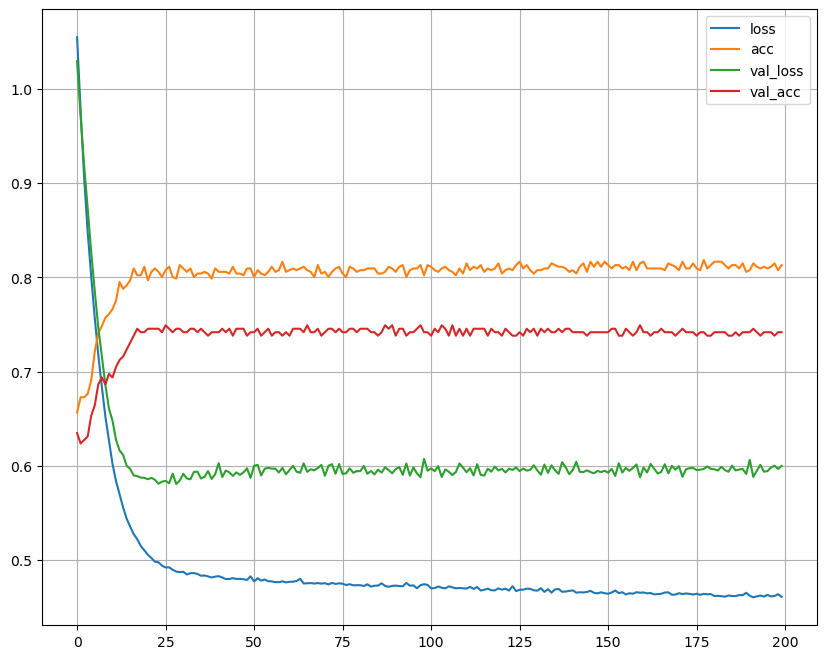

In [21]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [113]:
# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.6024843454360962
Validation accuracy: 0.7416974306106567


## Problem 1
Increase the number of features to include "F3" and "F4" and rerun the experiments. Try also adding the bandwidths ("B1"-"B4").

In [114]:
# Store results from original model
history_original = history

In [115]:
def get_phoneme_classifier_data(phonemes=["ae", "ey", "ux"], features=["F1", "F2"]):
    # We will be classifying three different vowels. Extract the training and validation data
    train = rawtrain[rawtrain["Phoneme"].isin(phonemes)]
    valid = rawvalid[rawvalid["Phoneme"].isin(phonemes)]
    trainlabels = [phonemes.index(ph) for ph in train["Phoneme"]]
    validlabels = [phonemes.index(ph) for ph in valid["Phoneme"]]

    # Extract features
    x_train_raw = train[features]
    x_valid_raw = valid[features]

    # Normalize to zero mean
    x_mean = np.mean(x_train_raw)
    x_std = np.std(x_train_raw)
    x_train = x_train_raw - x_mean
    x_valid = x_valid_raw - x_mean

    # Fix labels. The "to_categorical" call maps integer labels {n}
    # to a vector of length N (number of labels) with a one in position n
    y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
    y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

    return x_train, x_valid, y_train, y_valid

In [116]:
phonemes = ["ae", "ey", "ux"]
features = ["F1", "F2", "F3", "F4"]
x_train, x_valid, y_train, y_valid = get_phoneme_classifier_data(phonemes=phonemes, features=features)

# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history_all_formants = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=200, batch_size=32, verbose=True)

phonemes = ["ae", "ey", "ux"]
features = ["F1", "F2", "F3", "F4", "B1", "B2", "B3", "B4"]
x_train, x_valid, y_train, y_valid = get_phoneme_classifier_data(phonemes=phonemes, features=features)

# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history_all_formants_and_bandwidths = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=200, batch_size=32, verbose=True)

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 256)               1280      
                                                                 
 dense_118 (Dense)           (None, 3)                 771       
                                                                 
Total params: 2,051
Trainable params: 2,051
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200


/home/sigurd/miniconda3/envs/masksig/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


18/18 [==============================] - 1s 23ms/step - loss: 1.0578 - accuracy: 0.5827 - val_loss: 1.0336 - val_accuracy: 0.5203
Epoch 2/200
18/18 [==============================] - 0s 15ms/step - loss: 0.9775 - accuracy: 0.6097 - val_loss: 0.9895 - val_accuracy: 0.5277
Epoch 3/200
18/18 [==============================] - 0s 13ms/step - loss: 0.9178 - accuracy: 0.6097 - val_loss: 0.9525 - val_accuracy: 0.5461
Epoch 4/200
18/18 [==============================] - 0s 18ms/step - loss: 0.8685 - accuracy: 0.6619 - val_loss: 0.9099 - val_accuracy: 0.5904
Epoch 5/200
18/18 [==============================] - 0s 10ms/step - loss: 0.8217 - accuracy: 0.6924 - val_loss: 0.8666 - val_accuracy: 0.6125
Epoch 6/200
18/18 [==============================] - 0s 20ms/step - loss: 0.7776 - accuracy: 0.7086 - val_loss: 0.8273 - val_accuracy: 0.6310
Epoch 7/200
18/18 [==============================] - 0s 24ms/step - loss: 0.7382 - accuracy: 0.7194 - val_loss: 0.7857 - val_accuracy: 0.6384
Epoch 8/200
18/18 

/home/sigurd/miniconda3/envs/masksig/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


18/18 [==============================] - 1s 27ms/step - loss: 1.0685 - accuracy: 0.4694 - val_loss: 1.0477 - val_accuracy: 0.4317
Epoch 2/200
18/18 [==============================] - 0s 9ms/step - loss: 0.9922 - accuracy: 0.5360 - val_loss: 1.0081 - val_accuracy: 0.4723
Epoch 3/200
18/18 [==============================] - 0s 17ms/step - loss: 0.9351 - accuracy: 0.5809 - val_loss: 0.9751 - val_accuracy: 0.5203
Epoch 4/200
18/18 [==============================] - 0s 10ms/step - loss: 0.8886 - accuracy: 0.6277 - val_loss: 0.9346 - val_accuracy: 0.5646
Epoch 5/200
18/18 [==============================] - 0s 9ms/step - loss: 0.8430 - accuracy: 0.6781 - val_loss: 0.8890 - val_accuracy: 0.6125
Epoch 6/200
18/18 [==============================] - 0s 10ms/step - loss: 0.7983 - accuracy: 0.7014 - val_loss: 0.8482 - val_accuracy: 0.6273
Epoch 7/200
18/18 [==============================] - 0s 11ms/step - loss: 0.7560 - accuracy: 0.7140 - val_loss: 0.8069 - val_accuracy: 0.6421
Epoch 8/200
18/18 [=

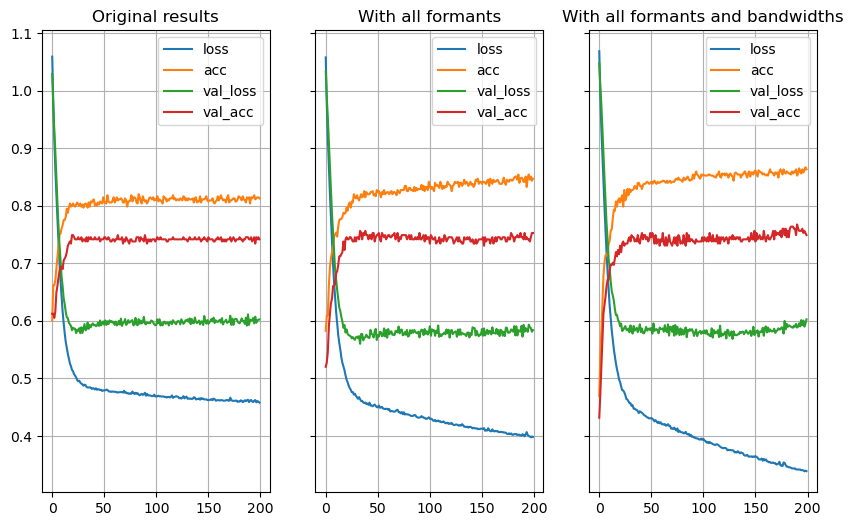

In [117]:
# Visualize the training results
fig, axes = plt.subplots(ncols=3, sharey=True, figsize=(10, 6))

axes[0].set_title("Original results")
axes[0].plot(history_original.history['loss'], label='loss')
axes[0].plot(history_original.history['accuracy'], label='acc')
axes[0].plot(history_original.history['val_loss'], label='val_loss')
axes[0].plot(history_original.history['val_accuracy'], label='val_acc')
axes[0].grid()
axes[0].legend()

axes[1].set_title("With all formants")
axes[1].plot(history_all_formants.history['loss'], label='loss')
axes[1].plot(history_all_formants.history['accuracy'], label='acc')
axes[1].plot(history_all_formants.history['val_loss'], label='val_loss')
axes[1].plot(history_all_formants.history['val_accuracy'], label='val_acc')
axes[1].grid()
axes[1].legend()

axes[2].set_title("With all formants and bandwidths")
axes[2].plot(history_all_formants_and_bandwidths.history['loss'], label='loss')
axes[2].plot(history_all_formants_and_bandwidths.history['accuracy'], label='acc')
axes[2].plot(history_all_formants_and_bandwidths.history['val_loss'], label='val_loss')
axes[2].plot(history_all_formants_and_bandwidths.history['val_accuracy'], label='val_acc')
axes[2].grid()
axes[2].legend()

plt.show()

## Problem 2
Change the number of nodes in the hidden layer and see how the results change. Try using dropout, and observe the results.

In [118]:
phonemes = ["ae", "ey", "ux"]
features = ["F1", "F2"]
x_train, x_valid, y_train, y_valid = get_phoneme_classifier_data(phonemes=phonemes, features=features)

# Create a model with dropout on input layer
model = keras.Sequential([
    keras.layers.Dropout(0.2, input_dim=x_train.shape[1]),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax),
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_input = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=200, batch_size=32, verbose=True)

# Create a model with dropout on hidden layer
model = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax),
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_hidden = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=200, batch_size=32, verbose=True)

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_51 (Dropout)        (None, 2)                 0         
                                                                 
 dense_121 (Dense)           (None, 512)               1536      
                                                                 
 dense_122 (Dense)           (None, 3)                 1539      
                                                                 
Total params: 3,075
Trainable params: 3,075
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200


/home/sigurd/miniconda3/envs/masksig/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


18/18 [==============================] - 1s 27ms/step - loss: 1.0462 - accuracy: 0.5845 - val_loss: 1.0055 - val_accuracy: 0.6384
Epoch 2/200
18/18 [==============================] - 0s 20ms/step - loss: 0.9451 - accuracy: 0.6511 - val_loss: 0.9354 - val_accuracy: 0.6236
Epoch 3/200
18/18 [==============================] - 0s 16ms/step - loss: 0.8779 - accuracy: 0.6493 - val_loss: 0.8843 - val_accuracy: 0.6384
Epoch 4/200
18/18 [==============================] - 0s 12ms/step - loss: 0.8219 - accuracy: 0.6709 - val_loss: 0.8274 - val_accuracy: 0.6458
Epoch 5/200
18/18 [==============================] - 0s 10ms/step - loss: 0.7764 - accuracy: 0.6942 - val_loss: 0.7727 - val_accuracy: 0.6716
Epoch 6/200
18/18 [==============================] - 0s 11ms/step - loss: 0.7641 - accuracy: 0.6871 - val_loss: 0.7430 - val_accuracy: 0.6753
Epoch 7/200
18/18 [==============================] - 0s 14ms/step - loss: 0.7140 - accuracy: 0.7104 - val_loss: 0.6976 - val_accuracy: 0.6974
Epoch 8/200
18/18 

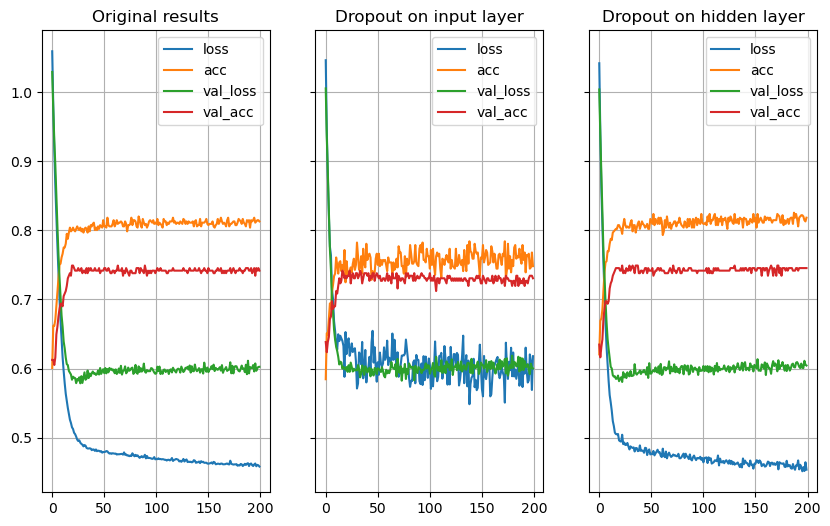

In [119]:
# Visualize the training results
fig, axes = plt.subplots(ncols=3, sharey=True, figsize=(10, 6))

axes[0].set_title("Original results")
axes[0].plot(history_original.history['loss'], label='loss')
axes[0].plot(history_original.history['accuracy'], label='acc')
axes[0].plot(history_original.history['val_loss'], label='val_loss')
axes[0].plot(history_original.history['val_accuracy'], label='val_acc')
axes[0].grid()
axes[0].legend()

axes[1].set_title("Dropout on input layer")
axes[1].plot(history_input.history['loss'], label='loss')
axes[1].plot(history_input.history['accuracy'], label='acc')
axes[1].plot(history_input.history['val_loss'], label='val_loss')
axes[1].plot(history_input.history['val_accuracy'], label='val_acc')
axes[1].grid()
axes[1].legend()

axes[2].set_title("Dropout on hidden layer")
axes[2].plot(history_hidden.history['loss'], label='loss')
axes[2].plot(history_hidden.history['accuracy'], label='acc')
axes[2].plot(history_hidden.history['val_loss'], label='val_loss')
axes[2].plot(history_hidden.history['val_accuracy'], label='val_acc')
axes[2].grid()
axes[2].legend()

plt.show()

## Problem 3
Add multiple layers to the network and observe the results.

In [120]:
phonemes = ["ae", "ey", "ux"]
features = ["F1", "F2"]
x_train, x_valid, y_train, y_valid = get_phoneme_classifier_data(phonemes=phonemes, features=features)

# Create a model with multiple hidden layers
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    # keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation=tf.nn.relu),
    # keras.layers.Dropout(0.2),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax),
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history_multilayer = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=200, batch_size=32, verbose=True)

# Create a model with multiple hidden layers and dropout
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax),
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history_multilayer_dropout = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=200, batch_size=32, verbose=True)

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_125 (Dense)           (None, 256)               768       
                                                                 
 dense_126 (Dense)           (None, 256)               65792     
                                                                 
 dense_127 (Dense)           (None, 3)                 771       
                                                                 
Total params: 67,331
Trainable params: 67,331
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200


/home/sigurd/miniconda3/envs/masksig/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


18/18 [==============================] - 1s 23ms/step - loss: 1.0095 - accuracy: 0.6619 - val_loss: 0.9288 - val_accuracy: 0.6531
Epoch 2/200
18/18 [==============================] - 0s 21ms/step - loss: 0.8081 - accuracy: 0.6835 - val_loss: 0.7519 - val_accuracy: 0.6679
Epoch 3/200
18/18 [==============================] - 0s 15ms/step - loss: 0.6465 - accuracy: 0.7338 - val_loss: 0.6416 - val_accuracy: 0.6937
Epoch 4/200
18/18 [==============================] - 0s 24ms/step - loss: 0.5676 - accuracy: 0.7842 - val_loss: 0.5910 - val_accuracy: 0.7380
Epoch 5/200
18/18 [==============================] - 0s 15ms/step - loss: 0.5257 - accuracy: 0.7968 - val_loss: 0.5762 - val_accuracy: 0.7417
Epoch 6/200
18/18 [==============================] - 0s 12ms/step - loss: 0.5017 - accuracy: 0.7968 - val_loss: 0.5821 - val_accuracy: 0.7491
Epoch 7/200
18/18 [==============================] - 0s 10ms/step - loss: 0.4995 - accuracy: 0.8004 - val_loss: 0.6034 - val_accuracy: 0.7528
Epoch 8/200
18/18 

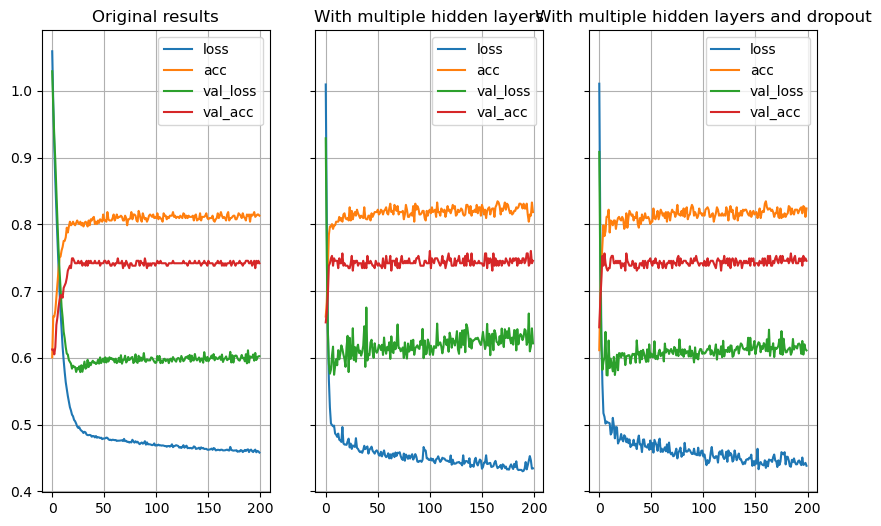

In [121]:
# Visualize the training results
fig, axes = plt.subplots(ncols=3, sharey=True, figsize=(10, 6))

axes[0].set_title("Original results")
axes[0].plot(history_original.history['loss'], label='loss')
axes[0].plot(history_original.history['accuracy'], label='acc')
axes[0].plot(history_original.history['val_loss'], label='val_loss')
axes[0].plot(history_original.history['val_accuracy'], label='val_acc')
axes[0].grid()
axes[0].legend()

axes[1].set_title("With multiple hidden layers")
axes[1].plot(history_multilayer.history['loss'], label='loss')
axes[1].plot(history_multilayer.history['accuracy'], label='acc')
axes[1].plot(history_multilayer.history['val_loss'], label='val_loss')
axes[1].plot(history_multilayer.history['val_accuracy'], label='val_acc')
axes[1].grid()
axes[1].legend()

axes[2].set_title("With multiple hidden layers and dropout")
axes[2].plot(history_multilayer_dropout.history['loss'], label='loss')
axes[2].plot(history_multilayer_dropout.history['accuracy'], label='acc')
axes[2].plot(history_multilayer_dropout.history['val_loss'], label='val_loss')
axes[2].plot(history_multilayer_dropout.history['val_accuracy'], label='val_acc')
axes[2].grid()
axes[2].legend()

plt.show()

In [131]:
# Try combining a bit of everything
phonemes = ["ae", "ey", "ux"]
features = ["F1", "F2", "F3", "F4"]
x_train, x_valid, y_train, y_valid = get_phoneme_classifier_data(phonemes=phonemes, features=features)

# Create a model with 2 hidden layers and dropout
model = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax),
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history_everything = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=200, batch_size=32, verbose=True)

# Try combining a bit of everything with input dropout
phonemes = ["ae", "ey", "ux"]
features = ["F1", "F2", "F3", "F4"]
x_train, x_valid, y_train, y_valid = get_phoneme_classifier_data(phonemes=phonemes, features=features)

# Create a model with 2 hidden layers and dropout
model = keras.Sequential([
    keras.layers.Dropout(0.2, input_dim=x_train.shape[1]),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax),
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history_everything_input_dropout = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=200, batch_size=32, verbose=True)


Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_146 (Dense)           (None, 512)               2560      
                                                                 
 dropout_67 (Dropout)        (None, 512)               0         
                                                                 
 dense_147 (Dense)           (None, 512)               262656    
                                                                 
 dropout_68 (Dropout)        (None, 512)               0         
                                                                 
 dense_148 (Dense)           (None, 3)                 1539      
                                                                 
Total params: 266,755
Trainable params: 266,755
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200


/home/sigurd/miniconda3/envs/masksig/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


18/18 [==============================] - 1s 32ms/step - loss: 0.9595 - accuracy: 0.5737 - val_loss: 0.8949 - val_accuracy: 0.6199
Epoch 2/200
18/18 [==============================] - 1s 60ms/step - loss: 0.7549 - accuracy: 0.6942 - val_loss: 0.7251 - val_accuracy: 0.6753
Epoch 3/200
18/18 [==============================] - 1s 40ms/step - loss: 0.6080 - accuracy: 0.7320 - val_loss: 0.6192 - val_accuracy: 0.7196
Epoch 4/200
18/18 [==============================] - 1s 37ms/step - loss: 0.5481 - accuracy: 0.7680 - val_loss: 0.6367 - val_accuracy: 0.7048
Epoch 5/200
18/18 [==============================] - 0s 19ms/step - loss: 0.5052 - accuracy: 0.7986 - val_loss: 0.5975 - val_accuracy: 0.7417
Epoch 6/200
18/18 [==============================] - 1s 29ms/step - loss: 0.4728 - accuracy: 0.8094 - val_loss: 0.6180 - val_accuracy: 0.7306
Epoch 7/200
18/18 [==============================] - 0s 23ms/step - loss: 0.4706 - accuracy: 0.8147 - val_loss: 0.5795 - val_accuracy: 0.7380
Epoch 8/200
18/18 

/home/sigurd/miniconda3/envs/masksig/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Epoch 1/200
18/18 [==============================] - 1s 49ms/step - loss: 0.9850 - accuracy: 0.5486 - val_loss: 0.9305 - val_accuracy: 0.5941
Epoch 2/200
18/18 [==============================] - 1s 33ms/step - loss: 0.8199 - accuracy: 0.6511 - val_loss: 0.7536 - val_accuracy: 0.6531
Epoch 3/200
18/18 [==============================] - 1s 61ms/step - loss: 0.7388 - accuracy: 0.6835 - val_loss: 0.6873 - val_accuracy: 0.6753
Epoch 4/200
18/18 [==============================] - 1s 35ms/step - loss: 0.7034 - accuracy: 0.6960 - val_loss: 0.6087 - val_accuracy: 0.7269
Epoch 5/200
18/18 [==============================] - 0s 26ms/step - loss: 0.6700 - accuracy: 0.7158 - val_loss: 0.6400 - val_accuracy: 0.6937
Epoch 6/200
18/18 [==============================] - 0s 25ms/step - loss: 0.6407 - accuracy: 0.7320 - val_loss: 0.5960 - val_accuracy: 0.7601
Epoch 7/200
18/18 [==============================] - 0s 27ms/step - loss: 0.6270 - accuracy: 0.7338 - val_loss: 0.6098 - val_accuracy: 0.7085
Epoch 

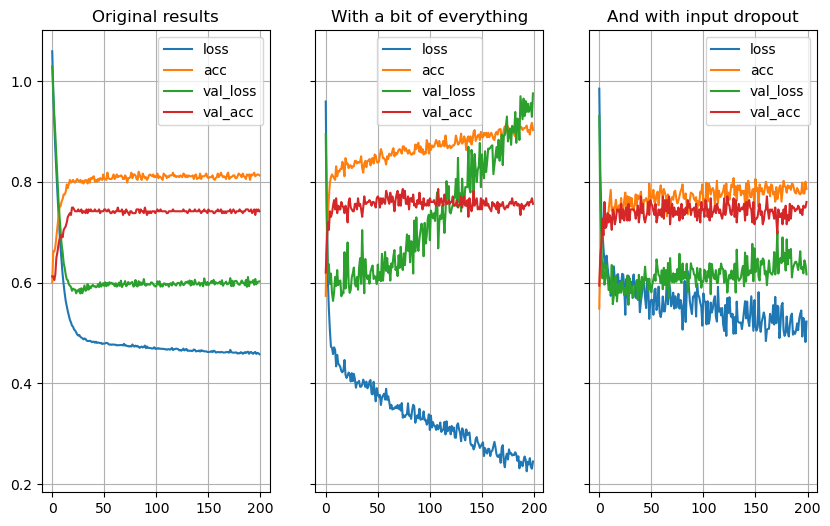

In [132]:
# Visualize the training results
fig, axes = plt.subplots(ncols=3, sharey=True, figsize=(10, 6))

axes[0].set_title("Original results")
axes[0].plot(history_original.history['loss'], label='loss')
axes[0].plot(history_original.history['accuracy'], label='acc')
axes[0].plot(history_original.history['val_loss'], label='val_loss')
axes[0].plot(history_original.history['val_accuracy'], label='val_acc')
axes[0].grid()
axes[0].legend()

axes[1].set_title("With a bit of everything")
axes[1].plot(history_everything.history['loss'], label='loss')
axes[1].plot(history_everything.history['accuracy'], label='acc')
axes[1].plot(history_everything.history['val_loss'], label='val_loss')
axes[1].plot(history_everything.history['val_accuracy'], label='val_acc')
axes[1].grid()
axes[1].legend()

axes[2].set_title("And with input dropout")
axes[2].plot(history_everything_input_dropout.history['loss'], label='loss')
axes[2].plot(history_everything_input_dropout.history['accuracy'], label='acc')
axes[2].plot(history_everything_input_dropout.history['val_loss'], label='val_loss')
axes[2].plot(history_everything_input_dropout.history['val_accuracy'], label='val_acc')
axes[2].grid()
axes[2].legend()

plt.show()

## Problem 4
Use the data to predict the gender of the speaker. Try including the format bandwidths as features as well ("B1"-"B4").

In [9]:
def get_gender_classifier_data(genders=["F", "M"], features=["F1", "F2"]):
    # We will be classifying two different genders. Extract the training and validation data
    train = rawtrain[rawtrain["Gender"].isin(genders)]
    valid = rawvalid[rawvalid["Gender"].isin(genders)]
    trainlabels = [genders.index(ph) for ph in train["Gender"]]
    validlabels = [genders.index(ph) for ph in valid["Gender"]]

    # Extract features
    x_train_raw = train[features]
    x_valid_raw = valid[features]

    # Normalize to zero mean
    x_mean = np.mean(x_train_raw)
    x_std = np.std(x_train_raw)
    x_train = x_train_raw - x_mean
    x_valid = x_valid_raw - x_mean

    # Fix labels. The "to_categorical" call maps integer labels {n}
    # to a vector of length N (number of labels) with a one in position n
    y_train = keras.utils.to_categorical(trainlabels, len(genders))
    y_valid = keras.utils.to_categorical(validlabels, len(genders))

    return x_train, x_valid, y_train, y_valid

In [10]:
genders = ["F", "M"]
features = ["F1", "F2", "F3", "F4"]
x_train, x_valid, y_train, y_valid = get_gender_classifier_data(genders=genders, features=features)

# Create a model with 2 hidden layers and dropout
model = keras.Sequential([
    keras.layers.Dropout(0.2, input_dim=x_train.shape[1]),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(len(genders), activation=tf.nn.softmax),
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history_genders = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=200, batch_size=32, verbose=True)

/home/sigurd/miniconda3/envs/masksig/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
2022-11-07 16:01:41.985474: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-07 16:01:41.989688: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:927] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-07 16:01:41.989762: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1660 Ti computeCapability: 7.5
coreClock: 1.59GHz coreCount: 24 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 268.26GiB/s
202

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 512)               2560      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1026      
Total params: 266,242
Trainable params: 266,242
Non-trainable params: 0
__________________________________________________

2022-11-07 16:01:42.839001: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-11-07 16:01:42.839354: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2994370000 Hz
2022-11-07 16:01:43.322180: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


394/394 [==============================] - 5s 11ms/step - loss: 0.5052 - accuracy: 0.7698 - val_loss: 0.4908 - val_accuracy: 0.7769
Epoch 2/200
394/394 [==============================] - 4s 11ms/step - loss: 0.4812 - accuracy: 0.7728 - val_loss: 0.4773 - val_accuracy: 0.7771
Epoch 3/200
394/394 [==============================] - 4s 11ms/step - loss: 0.4779 - accuracy: 0.7722 - val_loss: 0.4786 - val_accuracy: 0.7773
Epoch 4/200
394/394 [==============================] - 4s 11ms/step - loss: 0.4733 - accuracy: 0.7800 - val_loss: 0.4855 - val_accuracy: 0.7733
Epoch 5/200
394/394 [==============================] - 5s 12ms/step - loss: 0.4673 - accuracy: 0.7846 - val_loss: 0.4714 - val_accuracy: 0.7792
Epoch 6/200
394/394 [==============================] - 5s 13ms/step - loss: 0.4671 - accuracy: 0.7797 - val_loss: 0.4700 - val_accuracy: 0.7778
Epoch 7/200
394/394 [==============================] - 4s 10ms/step - loss: 0.4666 - accuracy: 0.7832 - val_loss: 0.4729 - val_accuracy: 0.7790
Epoc

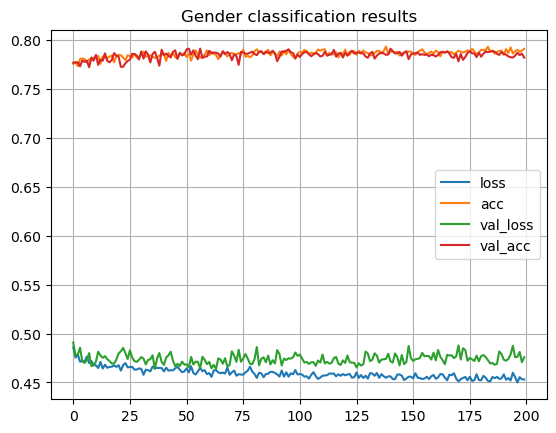

In [17]:
# Visualize the training results
plt.title("Gender classification results")
plt.plot(history_genders.history['loss'], label='loss')
plt.plot(history_genders.history['accuracy'], label='acc')
plt.plot(history_genders.history['val_loss'], label='val_loss')
plt.plot(history_genders.history['val_accuracy'], label='val_acc')
plt.grid()
plt.legend()

plt.show()